In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("../../preprocessing/data_preprocessed.csv")

In [3]:
df.head()

,a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),H (mag),MOID (AU),class
0,1.078066,0.826854,22.825495,31.382966,88.010681,215.528772,0.1867,1.97,16.90,0.034507,APO*
1,1.245304,0.335342,13.337482,276.893024,337.207958,104.155607,0.8277,1.66,15.60,0.030669,APO*
2,1.470264,0.559922,6.352995,285.852564,35.736768,174.626213,0.6470,2.29,16.25,0.025795,APO*
3,1.776025,0.650141,39.832538,267.791993,356.903343,173.188556,0.6214,2.93,15.20,0.003551,APO*
4,1.874123,0.764602,1.326399,43.388048,349.694944,235.158622,0.4412,3.31,18.80,0.011645,APO*


In [4]:
X = df.drop('class', axis=1)
y = df['class']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [6]:
pca = PCA(n_components = 3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [7]:
pca_names = [f'pca_{i}' for i in range(3)]
X_pca = pd.DataFrame(X_pca, columns = pca_names)
X_pca

,pca_0,pca_1,pca_2
0,0.058915,1.679911,2.961399
1,-1.305982,-1.313795,1.902921
2,-0.001329,0.250895,1.478462
3,0.614681,-0.602997,3.644217
4,1.488232,1.396926,0.372212
...,...,...,...
1742,-0.700643,-0.488094,-1.035565
1743,2.838650,0.668823,0.351246
1744,0.967316,1.099285,-1.128839
1745,1.114837,0.586035,-0.893929


In [8]:
model = AgglomerativeClustering(n_clusters=3, linkage='single', compute_distances=True)

In [9]:
model.fit(X_pca)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=3)

In [10]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
np.unique(model.labels_)

array([0, 1, 2])

In [12]:
model.children_.shape

(1746, 2)

In [13]:
model.distances_.reshape(-1,1).shape

(1746, 1)

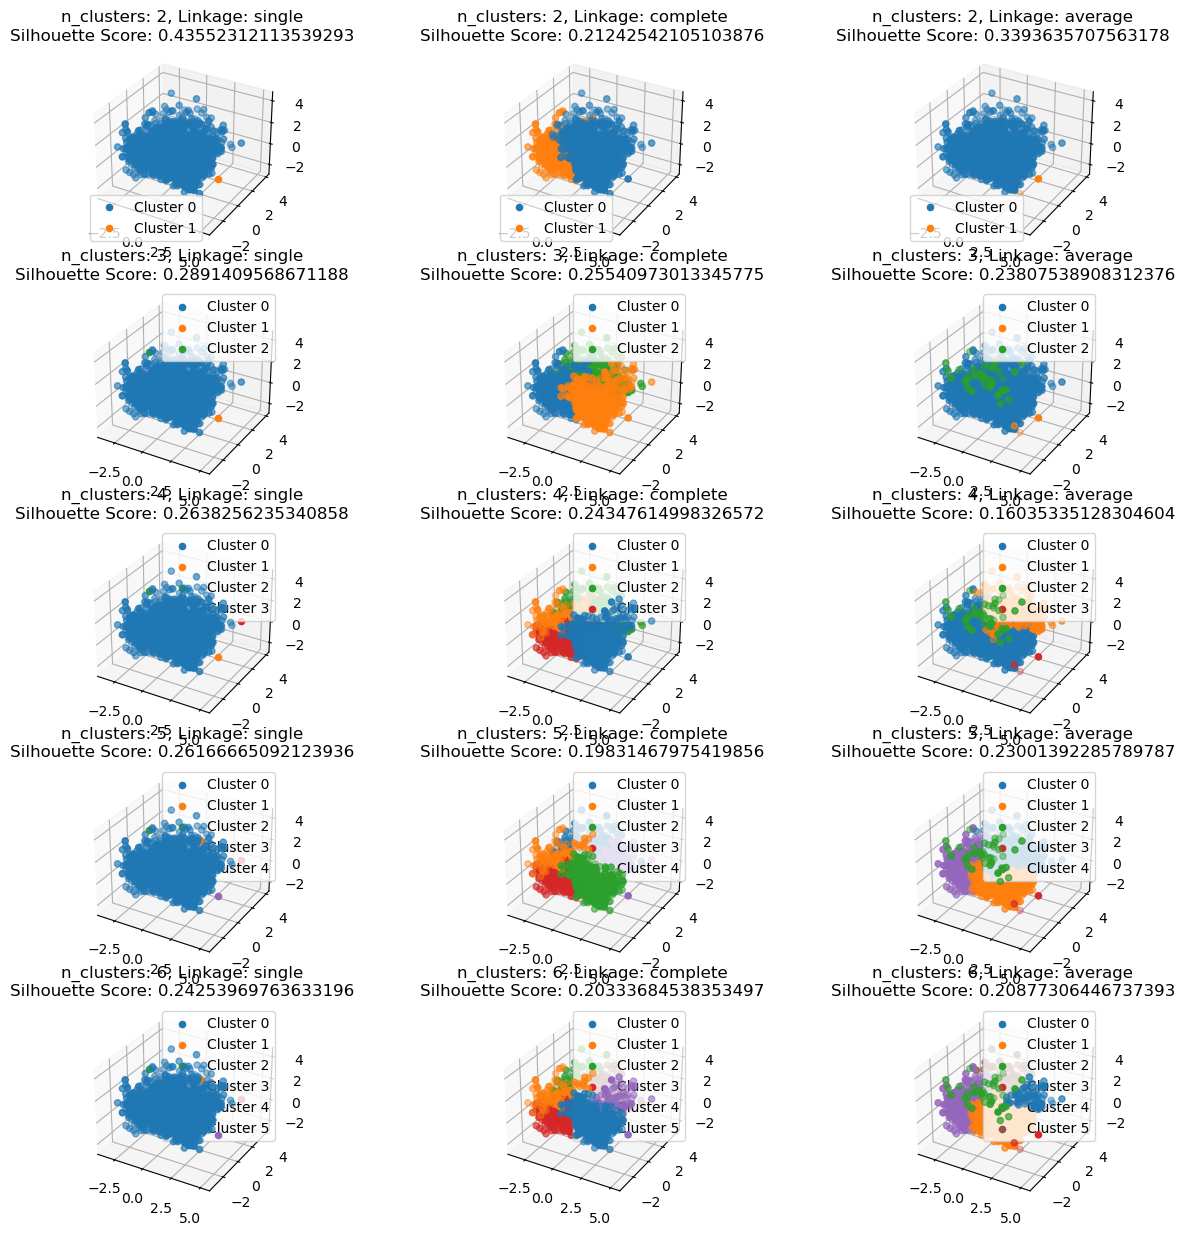

In [24]:


# Assuming X_pca is a pandas DataFrame with columns 'pca_0', 'pca_1', 'pca_2'

n_clusters_list = [2, 3, 4, 5, 6]  # Different values for n_clusters
linkages = ['single', 'complete', 'average']
fig = plt.figure(figsize=(15, 15))

for n_clusters in n_clusters_list:
    for idx, linkage in enumerate(linkages):
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        model.fit(X_pca)

        ax = fig.add_subplot(len(n_clusters_list), len(linkages), (n_clusters_list.index(n_clusters) * len(linkages)) + idx + 1, projection='3d')

        for cluster_label in range(n_clusters):
            cluster = X_pca[model.labels_ == cluster_label]
            ax.scatter(cluster['pca_0'], cluster['pca_1'], cluster['pca_2'], label=f'Cluster {cluster_label}')

        ax.set_title(f'n_clusters: {n_clusters}, Linkage: {linkage}\nSilhouette Score: {silhouette_score(X_pca, model.labels_)}')
        ax.legend()

plt.show()


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_pca, method='average')
Z

array([[1.04000000e+02, 1.50500000e+03, 2.74018244e-02, 2.00000000e+00],
       [8.38000000e+02, 1.19600000e+03, 2.97421940e-02, 2.00000000e+00],
       [3.51000000e+02, 5.20000000e+02, 3.12794509e-02, 2.00000000e+00],
       ...,
       [3.48800000e+03, 3.48900000e+03, 3.57072751e+00, 1.69900000e+03],
       [3.48600000e+03, 3.49000000e+03, 4.34353579e+00, 1.74400000e+03],
       [3.47600000e+03, 3.49100000e+03, 4.92414547e+00, 1.74700000e+03]])

In [17]:
X_pca.index

RangeIndex(start=0, stop=1747, step=1)

In [18]:
X_pca = X_pca.set_index(X_pca['pca_0'])

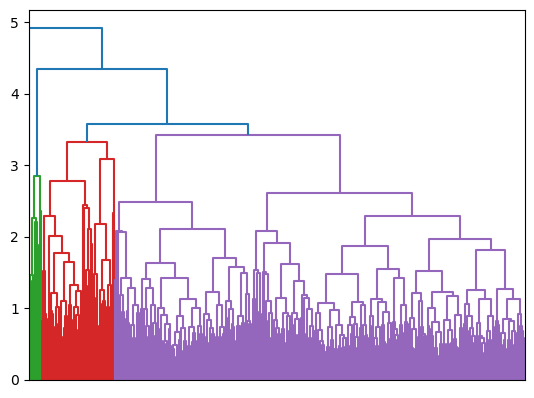

In [22]:
_ = dendrogram(Z, leaf_rotation=90, no_labels=True)